### Import Dataset

In [1]:
from GvaDataset import GvaDataset
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import v2
import os
import random
random.seed(137)

PROJECT_DIR = "/projectnb/dunlop/chrisdc/gva_senior_design/image_processing"

train_transform = v2.Compose([
    v2.Resize((1024, 512)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    # v2.RandomAffine(degrees=5, translate=(0.2, 0.2)),
    v2.ColorJitter()
])

test_transform = v2.Compose([
    v2.Resize((1024, 512))
])


train_images_path = os.path.join(PROJECT_DIR, "data/images/train")
train_labels_path = os.path.join(PROJECT_DIR, "data/labels/train")

test_images_path = os.path.join(PROJECT_DIR, "data/images/test")
test_labels_path = os.path.join(PROJECT_DIR, "data/labels/test")


train_dataset = GvaDataset(train_images_path, train_labels_path, transform=train_transform)
test_dataset = GvaDataset(test_images_path, test_labels_path, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

### Model-2

In [3]:
from experiment import Experiment
experiment = Experiment(device='cpu')
weights_path = os.path.join(PROJECT_DIR, "weights/model-2/10.pkl")
experiment.load_experiment(weights_path)

RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [3]:
assert False
weights_path = os.path.join(PROJECT_DIR, "weights/test-model-2/4.pkl")
experiment.load_experiment(weights_path)

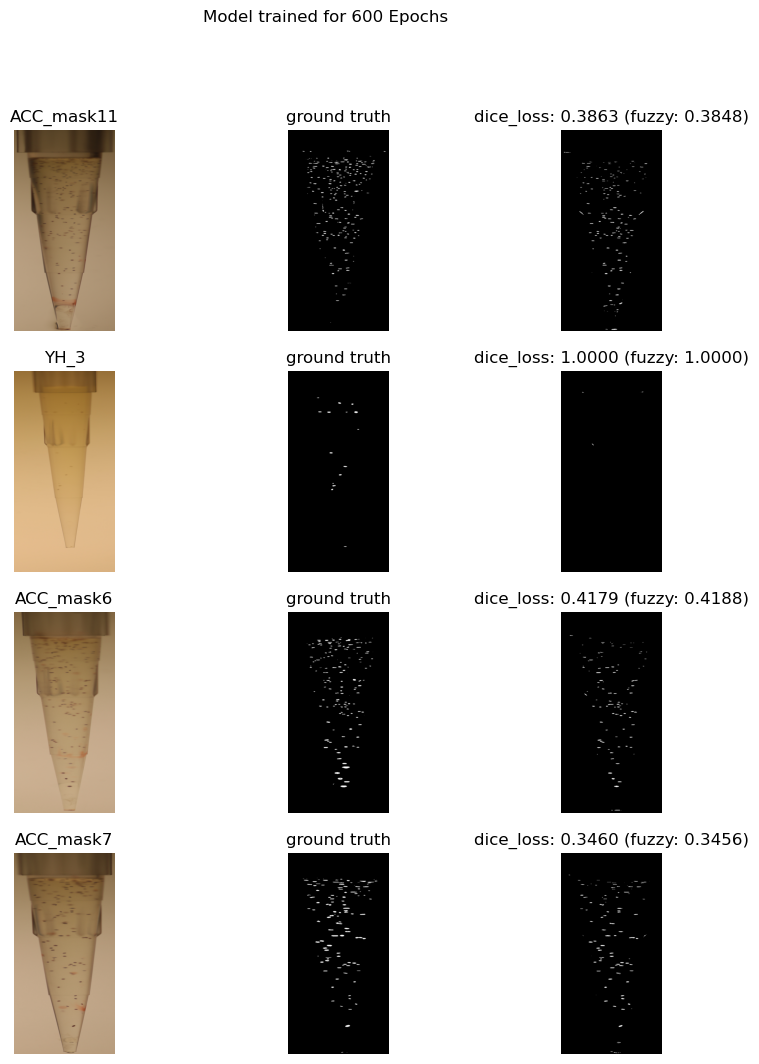

In [10]:
experiment.qualitative_eval(test_dataset)

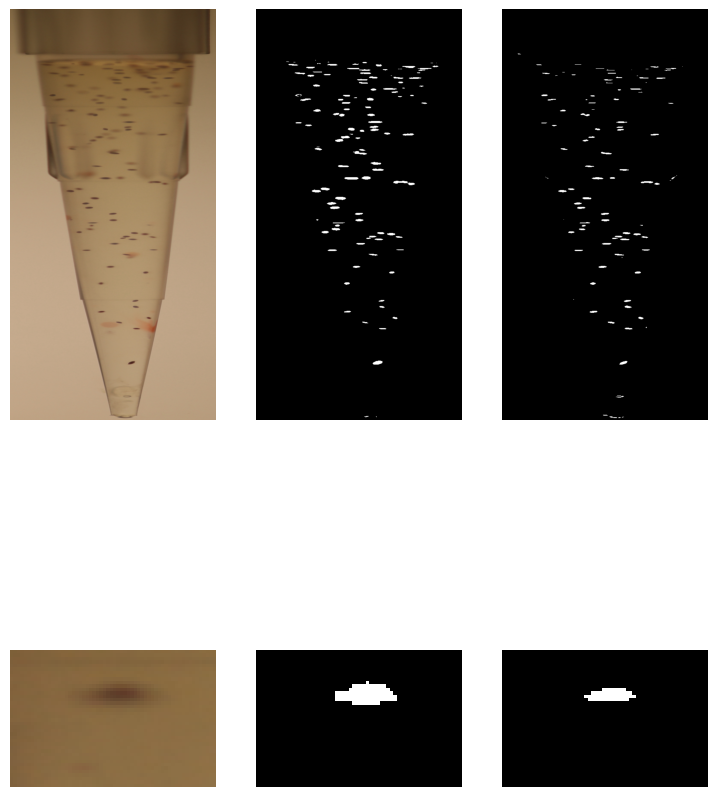

In [30]:
import matplotlib.pyplot as plt
with torch.no_grad():
    img, lab, file = test_dataset[3]
    img = img.to(device)
    img = img.unsqueeze(0)
    pred = experiment.model(img)
    
    img = img.squeeze()
    img = img.to('cpu')
    img = img.permute(1, 2, 0)
    
    pred = pred.to('cpu')
    pred = pred.squeeze()
    pred = pred > 0.5

    x_start = 240
    x_end = 280
    y_start = 120
    y_end = 180
    
    img_crop = img[x_start:x_end, y_start:y_end]
    pred_crop = pred[x_start:x_end, y_start:y_end]
    lab_crop = lab[x_start:x_end, y_start:y_end]
    
    fig, ax = plt.subplots(2, 3, figsize=(9, 12))
    ax[0, 0].imshow(img)
    ax[0, 0].axis('off')
    ax[0, 1].imshow(lab, cmap='gray')
    ax[0, 1].axis('off')
    ax[0, 2].imshow(pred, cmap='gray')
    ax[0, 2].axis('off')

    ax[1, 0].imshow(img_crop)
    ax[1, 0].axis('off')
    ax[1, 1].imshow(lab_crop, cmap='gray')
    ax[1, 1].axis('off')
    ax[1, 2].imshow(pred_crop, cmap='gray')
    ax[1, 2].axis('off')

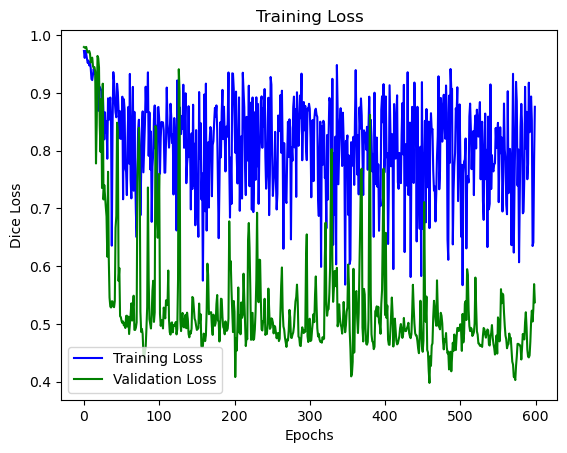

In [31]:
experiment.plot_loss()